
## Introduction to Regression using Neural Networks in TensorFlow

`Wiki` - In statistical modeling, "Regression Analysis" is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').


In [1]:
# Import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


#### How about creating some data yourself. Let's create X and y and get a feel of what exactly fitting a line looks like.

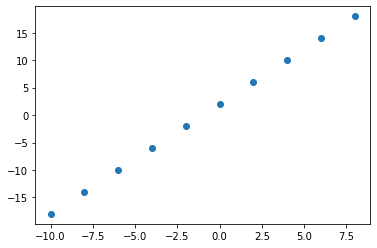

In [2]:
# Create features
X = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8])

# Create labels
y = np.array([-18, -14, -10, -6, -2, 2, 6, 10, 14, 18])

# Let's plot these!!
plt.scatter(X, y)

#### The above dataset is a perfect line. In fact, y = 2X+2 is the exact equation. If we need to 'predict' value for X=100, it's simply 202. It would be good candidate for cases where we DO NOT use Machine Learning. However, in real-life cases, the data won't be aligned perfectly to a curve (why should it always be a line) and hence Machine Learning comes into picture

In [3]:
y == 2 * X + 2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

#### In this case, still if someone decides to create a model - Input Shape = [1], Output Shape = [1] (IN TENSOR TERMS, shape of numpy array will be 10!)

### Steps in creating a Deep Learning model (or any Machine Learning model if we replace layers with other algorithm)


* **Get the data** - Data prep
* **Creating model architecture** - Define Input, Hidden and Output layers of the model
* **Compile the model** - Define the loss function (tells the model how wrong it is in the current epoch). Define the optimizer (tells the model how to improve the patterns it is learning). Define Evaluation metrics (Metrics where we think model should be right/wrong)
* **Fitting the model** - Letting the model find the patterns on the entire dataset
    * Epochs - How many times the model will go over all of the training data
* **Evaluate the model** - Evaluation of model performance on the metrics we have chosen
* **Experimentation** - Improve model peformance through various experiments
* **Save and use** - Save the model, use it for predictions


Apply this workflow on above dataset

In [4]:
# Step 1 - Prepare the data

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18])>)

In [5]:
# Step 2 - Create model architecture

# First, seeeeeeeed
tf.random.set_seed(42)

# Create a structure using Sequential API. This basically means, whatever input is inside it, TF will look at those sequentially
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)] # 1 because input shape is 1
)

# Another way to create a sequential model - most of the doc follows this, although these are absolutely same
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [6]:
# Step 3 - Compile the model

model.compile(loss = tf.keras.losses.mae, optimizer='adam', metrics=['mae'])

In [7]:
# Step 4 - Fitting the model

model.fit(X, y, epochs = 5) #Epochs is basically laps around the data

Epoch 1/5
1/1 [==============================] - 0s 358ms/step - loss: 7.1497 - mae: 7.1497
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 7.1447 - mae: 7.1447
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 7.1397 - mae: 7.1397
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 7.1347 - mae: 7.1347
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 7.1297 - mae: 7.1297


In [8]:
# Step 5 - Evaluate the model

model.evaluate(X, y)

1/1 [==============================] - 0s 119ms/step - loss: 7.1247 - mae: 7.1247


[7.124701023101807, 7.124701023101807]

In [9]:
# LOOOOOOL. Let's do something before someone trynna save this model!!

In [10]:
# Step 6 - Make predictions

model.predict([10]) # Exact output --> 10 * 2 + 2 = 22

array([[5.7505984]], dtype=float32)

### Model performance improvement

Before going into saving and re-using this model, let's try to improve this!

Hyperparameter tuning - 
* **Architecture** - Increase/Decrease hidden layers and their neurons. Activation function in each layer
* **Compilation** - Change optimization function, `learning rate`
* **Fitting** - Increase/Decrease epochs, get more data

In [11]:
# Experiment 1 - Add hidden layers

# Create the model
model_exp1 = tf.keras.Sequential()
model_exp1.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_exp1.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_exp1.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_exp1.add(tf.keras.layers.Dense(1))

# Compile the model
model_exp1.compile(loss = tf.keras.losses.mae, optimizer='adam', metrics=['mae'])

# Fit the model
model_exp1.fit(X, y, epochs = 5) #Epochs is basically laps around the data

# Evaluate the model
print('Model Evaluation', model_exp1.evaluate(X, y))

# Make predictions
print('Predicted value', model_exp1.predict(tf.constant([10]))) # Exact output --> 10 * 2 + 2 = 22

Epoch 1/5
1/1 [==============================] - 1s 506ms/step - loss: 9.9602 - mae: 9.9602
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 9.7692 - mae: 9.7692
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 9.5743 - mae: 9.5743
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 9.3788 - mae: 9.3788
Epoch 5/5
1/1 [==============================] - 0s 111ms/step - loss: 8.9882 - mae: 8.9882
Model Evaluation [8.988167762756348, 8.988167762756348]
Predicted value [[0.84333867]]


In [12]:
# Experiment 1 - Increase number of epochs

# Create the model
model_exp2 = tf.keras.Sequential()
model_exp2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_exp2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_exp2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_exp2.add(tf.keras.layers.Dense(1))

# Compile the model
model_exp2.compile(loss = tf.keras.losses.mae, optimizer='adam', metrics=['mae'])

# Fit the model
model_exp2.fit(X, y, epochs = 30, verbose = False) #Epochs is basically laps around the data

# Evaluate the model
print('Model Evaluation', model_exp2.evaluate(X, y))

# Make predictions
print('Predicted value', model_exp2.predict(tf.constant([10]))) # Exact output --> 10 * 2 + 2 = 22

1/1 [==============================] - 0s 111ms/step - loss: 1.5423 - mae: 1.5423
Model Evaluation [1.542271375656128, 1.542271375656128]
Predicted value [[27.265654]]


In [13]:
# Model Evaluation is an array of loss and metrics - here [loss, mae]. Both are same, since our loss metric is mae

# A good idea whenever building a TensorFlow model is to look what the model summary is
model_exp2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


So it took us 30 epochs around 10 training examples, training and tweaking 20,501 parameters to get a good predictions.

Talk about killing an ant with a tank !!

One good idea in this case would have been to increase the learning rate. We see that initial epochs result in minimal learning. In such cases, learning rate could be very impactful.  

One thing to note in experimentation is don't try to tweak all hyperparameters at once. Rather change 1, keep the rest same. This will help to judge the one parameter which is creating the most impact. Also, if you think a change is a good impact on the model, you can try to keep it included in all the experiments down the line.

### The 3 Sets

* **Training Set** - The model learns patterns from this dataset. Typically 70-80% of the data
* **Validation Set** - The model tunes on this data. This data IS PASSED TO THE MODEL DURING TRAINING. Typically 10-20%
* **Test Set** - The model is evaluated on this UNSEEN dataset. This data is not passed during training. Typically 10-20%|


Let's expand our data, split in Train-Test set, build the model and evaluate it.

In [14]:
X = tf.range(-1000, 1000, 2)
y = X * 2 + 2

X.ndim, X.shape, y.ndim, y.shape

(1, TensorShape([1000]), 1, TensorShape([1000]))

So, Rank 1 tensors X and y, and we have 5000 data points available

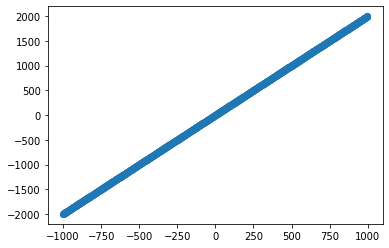

In [15]:
plt.scatter(X, y)

# This is expected

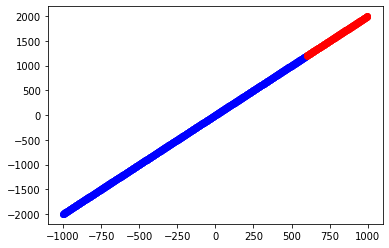

In [16]:
# Although TensorFlow has better functions to do train-validation-test split, for our use case, we can simply use indexing

# Fraction of test data we want. Train will naturally be 1-test_size
test_size = 0.2

# What amount of data we have?
data_volume = len(X)


# So, define train and test data. We can use shuffling, random sampling and stratified sampling according to the problem
train_indices = int(data_volume * (1 - test_size))

X_train, y_train = X[0:train_indices], y[0:train_indices]
X_test, y_test = X[train_indices:], y[train_indices:]

# Let's plot these
# Training data
plt.scatter(X_train, y_train, c = 'b', label = 'Training')

# Testing data
plt.scatter(X_test, y_test, c = 'r', label = 'Testing')

# Show the output
plt.show();

In [17]:
#### NICE!!

# Standard processes. Now, let's go into the modelling part

# Step 1 - Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Step 2 - Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = 'adam',
              metrics = ['mae'])

# Step 3 - Fitting the model
model.fit(X_train, y_train, epochs=10, verbose = False)

# Let's calculate trainable parameters - 
L1 = 20 + 20
L2 = 20 * 20 + 20
L3 = 20 + 1

print("Total Trainable Parameters = ", L1 + L2 + L3)


# And now that model's fit on the data, we can verify the above result using model.summary()
model.summary() #### NICE!!


Total Trainable Parameters =  481
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (32, 20)                  40        
_________________________________________________________________
dense_11 (Dense)             (32, 1)                   21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


> Non-trainable aren't updated during training. This is typical in case of embeddings

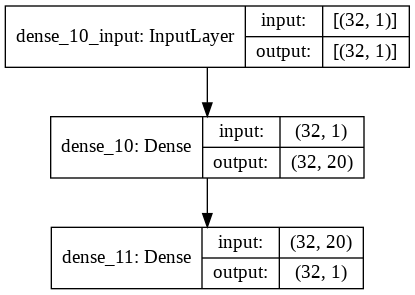

In [18]:
# Another way to visualize the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
# Let's predict and visualize the test set and model's performance
y_pred = model.predict(X_test)

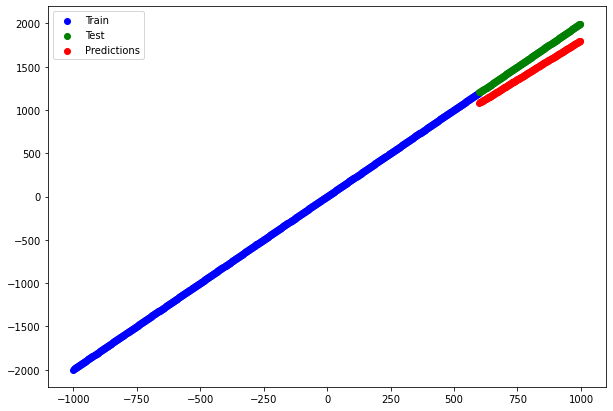

In [20]:
def visualize_predictions(train_data = X_train,
                          train_labels = y_train,
                          test_data = X_test,
                          test_labels = y_test,
                          predictions = y_pred):
  
  # Plot size
  plt.figure(figsize=[10, 7])
  # Plot training data
  plt.scatter(train_data, train_labels, c = 'b', label = 'Train')
  # Plot testing data
  plt.scatter(test_data, test_labels, c = 'g', label = 'Test')
  # Plot Predictions - Remember, for preds, X = X_test
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  # Show the plot
  plt.legend();

visualize_predictions()

In [21]:
# The model is a bit off. And on the scale, predictions might even be off by 10's to 100's
# We can again go back and experiment with epochs, learning rate etc.

#### Model Evaluation

* MAE - Mean Absolute Error, how much on an average our predictions are 'off' from the actual value

* MSE - Mean Squared Error, how much is the squared difference between model's predictions and actual value

In [22]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 158.0210 - mae: 158.0210


[158.02098083496094, 158.02098083496094]

In [23]:
# If we don't use the squeeze method, since y_pred and y_test have different shape, mae and mse will be len(n) tensors
mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred))
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))

print('Mean Absolute Error : ', mae)
print('Mean Squared Error : ', mse)

Mean Absolute Error :  tf.Tensor(158.02098, shape=(), dtype=float32)
Mean Squared Error :  tf.Tensor(25483.805, shape=(), dtype=float32)


### Save and Load Models

Saving models helps us to use them outside training (or dev) environment and deploy them where we only require their predictions. Generally, you would train your model, experiment, figure out what is the best model for the particular problem. At last, when you are done with all of that, you want to use the model for predictions, for classifications in a web app or mobile app. In these higher environments, we won't do training or experimenting, rather simply use the model and make predictions. 

There are 2 main formats of saving models in TensorFlow - 

1. `SavedModel` Format
2. `HDF5` Format

In [24]:
# Let's save in SavedModel format
model.save('SavedModelFormat')

# Also, use the HDF5 format
model.save('HDF5Format.h5')

INFO:tensorflow:Assets written to: SavedModelFormat/assets


In [25]:
# Load both models
savedFormatModel = tf.keras.models.load_model("/content/SavedModelFormat")

hdf5Model = tf.keras.models.load_model("/content/HDF5Format.h5")

In [26]:
# Make predictions from all the 3 model states
# Ideally, saved model should give the same output as model it used to save.... duhhhh
actual_pred = model.predict(tf.constant([100]))

savedFormat_pred = savedFormatModel.predict(tf.constant([100]))

hdf5_pred = hdf5Model.predict(tf.constant([100]))

actual_pred, savedFormat_pred, hdf5_pred

(array([[181.11325]], dtype=float32),
 array([[181.11325]], dtype=float32),
 array([[181.11325]], dtype=float32))

In [27]:
# If A=B and B=C, A=C!!!!!!!!!


# Following code is commented due to large output, but could be run to verify if all the 3 model states give the same output
# model.predict(X_test) == savedFormatModel.predict(X_test)

# savedFormatModel.predict(X_test) == hdf5Model.predict(X_test)

#### So, in these notebook, we saw a basic introduction to Regression in TensorFlow. We created our own dataset, both feature and label and then created a lot of models. We saw how we can tweak hyperparameters and saw a good paradigm on how to approach experiments in general. Using our principle of 'Visualize, Experiment, Repeat', we created the models and also learnt to save and load them for deployment purposes